# Dataset Link : https://github.com/pbf1712/Python_Project/tree/main/Covid_19%20Data%20Analysis

# Insights : https://github.com/pbf1712/Python_Project/blob/main/Covid_19%20Data%20Analysis/Covid-19_DA_Insight.pdf

# Covid19 data

# Data Cleaning

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
df.drop(columns={'Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'},inplace = True)

In [5]:
df.duplicated().value_counts()

False    18110
Name: count, dtype: int64

In [6]:
df.isna().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 707.6+ KB


In [8]:
print(df['State/UnionTerritory'].unique(),df['State/UnionTerritory'].nunique())

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Bihar****' 'Madhya Pradesh***'
 'Himanchal Pradesh' 'Karanataka' 'Maharashtra***'] 46


In [9]:
df[df['State/UnionTerritory'] == 'Maharashtra***']

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
17338,2021-07-21,Maharashtra***,6000911,130753,6229596


In [10]:
df['State/UnionTerritory'] = df['State/UnionTerritory'].apply(lambda x : x.replace('*',''))
df['State/UnionTerritory'] = df['State/UnionTerritory'].apply(lambda x : x.replace('Karanataka','Karnataka'))

In [11]:
print(df['State/UnionTerritory'].unique(),df['State/UnionTerritory'].nunique())

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya'
 'Dadra and Nagar Haveli and Daman and Diu'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu' 'Lakshadweep'
 'Telangana' 'Dadra and Nagar Haveli' 'Himanchal Pradesh'] 42


In [12]:
df['Date'].min()

'2020-01-30'

In [13]:
df['Date'].max()

'2021-08-11'

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['Month'] = df['Date'].apply(lambda x : x.month)

In [16]:
month_label = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['Month'] = df['Month'].map(month_label)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
 5   Month                 18110 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 849.0+ KB


In [18]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Month
0,2020-01-30,Kerala,0,0,1,jan
1,2020-01-31,Kerala,0,0,1,jan
2,2020-02-01,Kerala,0,0,2,feb
3,2020-02-02,Kerala,0,0,3,feb
4,2020-02-03,Kerala,0,0,3,feb


In [19]:
df['Year'] = df['Date'].apply(lambda x : x.year)

In [20]:
df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Month,Year
18105,2021-08-11,Telangana,638410,3831,650353,aug,2021
18106,2021-08-11,Tripura,77811,773,80660,aug,2021
18107,2021-08-11,Uttarakhand,334650,7368,342462,aug,2021
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,aug,2021
18109,2021-08-11,West Bengal,1506532,18252,1534999,aug,2021


In [21]:
df.insert(5, 'Active_case', df['Confirmed'] - (df['Cured'] + df['Deaths']))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
 5   Active_case           18110 non-null  int64         
 6   Month                 18110 non-null  object        
 7   Year                  18110 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.1+ MB


In [23]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_case,Month,Year
0,2020-01-30,Kerala,0,0,1,1,jan,2020
1,2020-01-31,Kerala,0,0,1,1,jan,2020
2,2020-02-01,Kerala,0,0,2,2,feb,2020
3,2020-02-02,Kerala,0,0,3,3,feb,2020
4,2020-02-03,Kerala,0,0,3,3,feb,2020


# EDA

# State_wise Analysis

In [24]:
pivot1 = pd.pivot_table(data = df,values = ['Cured','Deaths','Confirmed','Active_case'],index = 'State/UnionTerritory',aggfunc = 'sum')

In [25]:
pivot1

,Active_case,Confirmed,Cured,Deaths
State/UnionTerritory,,,,
Andaman and Nicobar Islands,63076,1938498,1848286,27136
Andhra Pradesh,19066856,392432753,370426530,2939367
Arunachal Pradesh,561959,7176907,6588149,26799
Assam,6520008,99837011,92678680,638323
Bihar,6024358,133662075,126525370,1112347
Cases being reassigned to states,345565,345565,0,0
Chandigarh,593898,10858627,10117035,147694
Chhattisgarh,10102978,163776262,151609364,2063920
Dadra and Nagar Haveli,362,20722,20352,8


In [26]:
pivot1['Mortality Rate']= round((pivot1['Deaths'] / pivot1['Confirmed']) *100,2)

In [27]:
pivot1

,Active_case,Confirmed,Cured,Deaths,Mortality Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,63076,1938498,1848286,27136,1.40
Andhra Pradesh,19066856,392432753,370426530,2939367,0.75
Arunachal Pradesh,561959,7176907,6588149,26799,0.37
Assam,6520008,99837011,92678680,638323,0.64
Bihar,6024358,133662075,126525370,1112347,0.83
Cases being reassigned to states,345565,345565,0,0,0.00
Chandigarh,593898,10858627,10117035,147694,1.36
Chhattisgarh,10102978,163776262,151609364,2063920,1.26
Dadra and Nagar Haveli,362,20722,20352,8,0.04


In [28]:
pivot1['Recovery rate'] = round((pivot1['Cured'] / pivot1['Confirmed'])*100,2)  # we can observed that mortality rate is low than recovery rate
pivot1

,Active_case,Confirmed,Cured,Deaths,Mortality Rate,Recovery rate
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,63076,1938498,1848286,27136,1.40,95.35
Andhra Pradesh,19066856,392432753,370426530,2939367,0.75,94.39
Arunachal Pradesh,561959,7176907,6588149,26799,0.37,91.80
Assam,6520008,99837011,92678680,638323,0.64,92.83
Bihar,6024358,133662075,126525370,1112347,0.83,94.66
Cases being reassigned to states,345565,345565,0,0,0.00,0.00
Chandigarh,593898,10858627,10117035,147694,1.36,93.17
Chhattisgarh,10102978,163776262,151609364,2063920,1.26,92.57
Dadra and Nagar Haveli,362,20722,20352,8,0.04,98.21


In [29]:
pivot1.sort_values(by = 'Confirmed',ascending= False,inplace = True)

In [30]:
pivot1.style.background_gradient(cmap="CMRmap")
#lowest value : black 
# intermediate value  : yellow
# highest value : white

,Active_case,Confirmed,Cured,Deaths,Mortality Rate,Recovery rate
State/UnionTerritory,,,,,,
Maharashtra,79086928,1127721063,1024765950,23868185,2.120000,90.870000
Karnataka,38100121,488855931,444665851,6089959,1.250000,90.960000
Kerala,36843611,458906023,420174235,1888177,0.410000,91.560000
Tamil Nadu,21916179,431928644,404095807,5916658,1.370000,93.560000
Andhra Pradesh,19066856,392432753,370426530,2939367,0.750000,94.390000
Uttar Pradesh,17003042,312625843,291479351,4143450,1.330000,93.240000
Delhi,8864584,287227765,273419887,4943294,1.720000,95.190000
West Bengal,11745785,263107876,247515102,3846989,1.460000,94.070000
Chhattisgarh,10102978,163776262,151609364,2063920,1.260000,92.570000


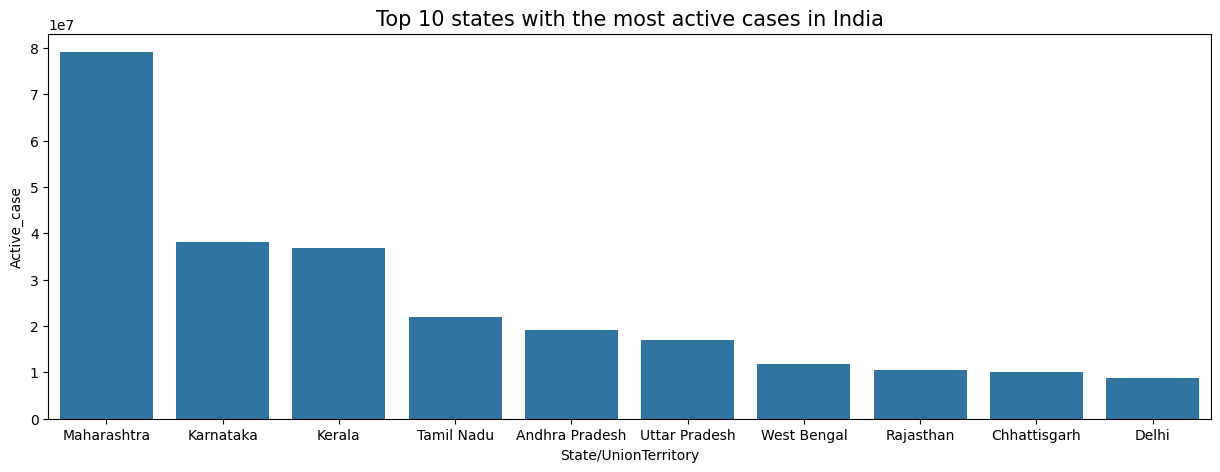

In [31]:
#Top 10 State Active_cases
import seaborn as sns

sort2 = pivot1.sort_values(by = 'Active_case',ascending= False)
plt.figure(figsize = (15,5))
cx = sns.barplot(x = sort2.index[:10],y = sort2['Active_case'][:10])
plt.title('Top 10 states with the most active cases in India',size = 15)
plt.show()

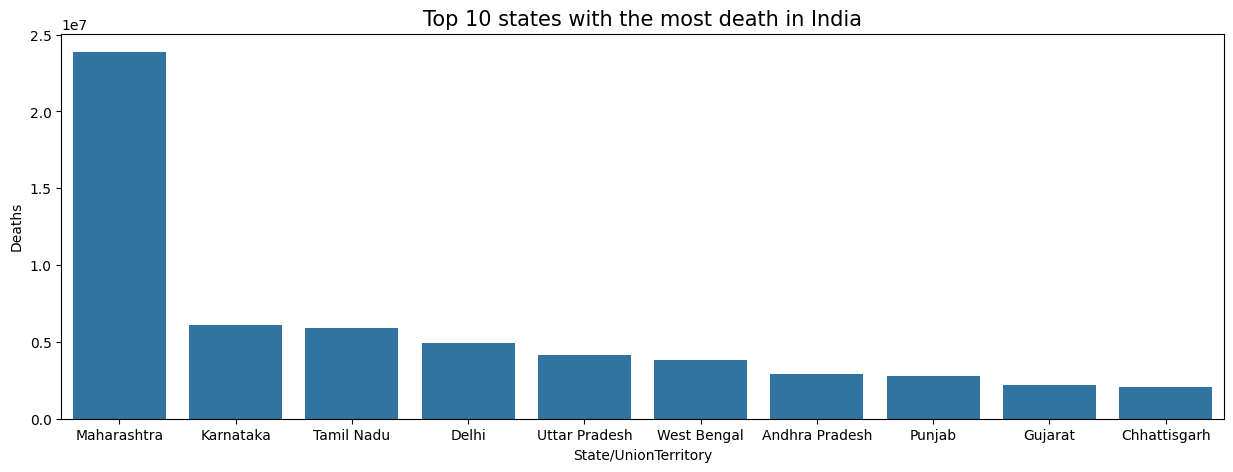

In [32]:
sort1 = pivot1.sort_values(by = 'Deaths',ascending= False)
plt.figure(figsize = (15,5))
cx = sns.barplot(x = sort1.index[:10],y = sort1['Deaths'][:10])
plt.title('Top 10 states with the most death in India',size = 15)
plt.show()

In [33]:
# State with the Maximum Morality rate
print('State with the Maximum Morality rate :',pivot1['Mortality Rate'].idxmax())

#State with the maximum recovery rate.
print('State with the maximum recovery rate :',pivot1['Recovery rate'].idxmax())


State with the Maximum Morality rate : Punjab
State with the maximum recovery rate : Dadra and Nagar Haveli


By looking at the table, we can conclude that most affected state by covid-19 was Maharashtra

# Month_Wise Analysis

In [34]:
# monthly distributed cases 
pivot3 = pd.pivot_table(data = df,values = ['Active_case','Deaths','Cured'],index = 'Month',aggfunc = 'sum').reset_index()
print(pivot3)

   Month  Active_case      Cured    Deaths
0    apr     50663912  385065633   5353568
1    aug     25076495  399775889   6247991
2    dec     10475889  292244085   4457379
3    feb      4138653  297133802   4359434
4    jan      6428563  315332019   4709167
5   july     24518039  955269787  13575039
6   june     34934392  848822379  11475067
7    mar      8768643  342611205   4935455
8    may    100144863  646240106   8480751
9    nov     14449046  246213201   3894165
10   oct     24488285  198824412   3457615
11   sep     28077450  118592934   2443374


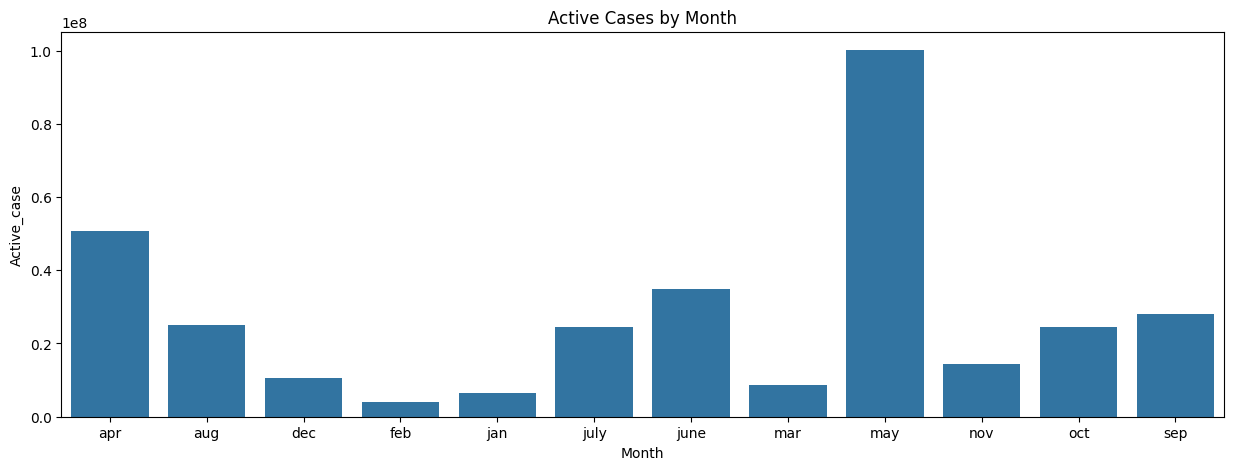

In [35]:
# Active Cases by Month
plt.figure(figsize = (15,5))
cx = sns.barplot(x = 'Month',y = 'Active_case',data = pivot3)
plt.title('Active Cases by Month')
plt.show()

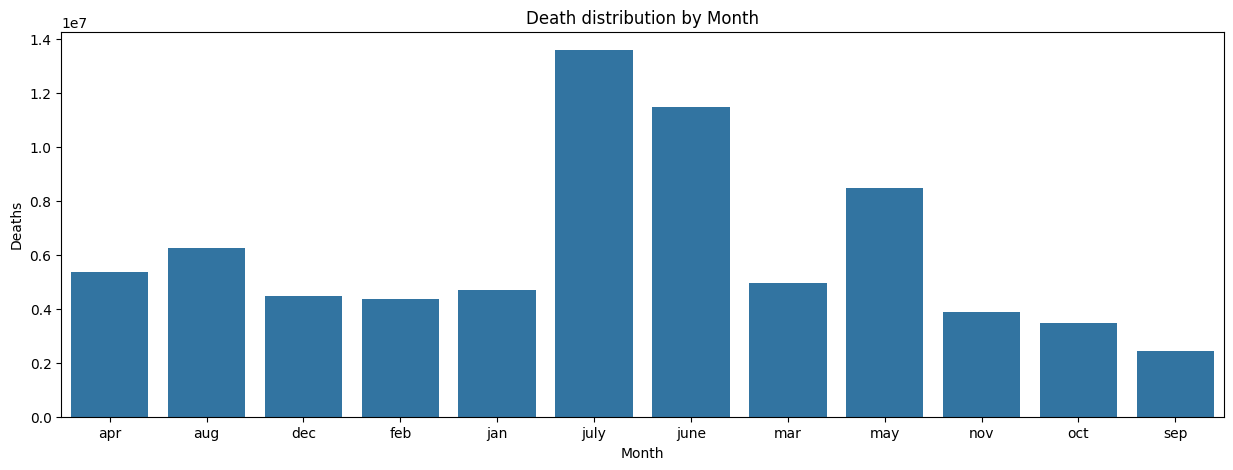

In [36]:
# Death distribution by Month
plt.figure(figsize = (15,5))
cx = sns.barplot(x = 'Month',y = 'Deaths',data = pivot3)
plt.title('Death distribution by Month')
plt.show()

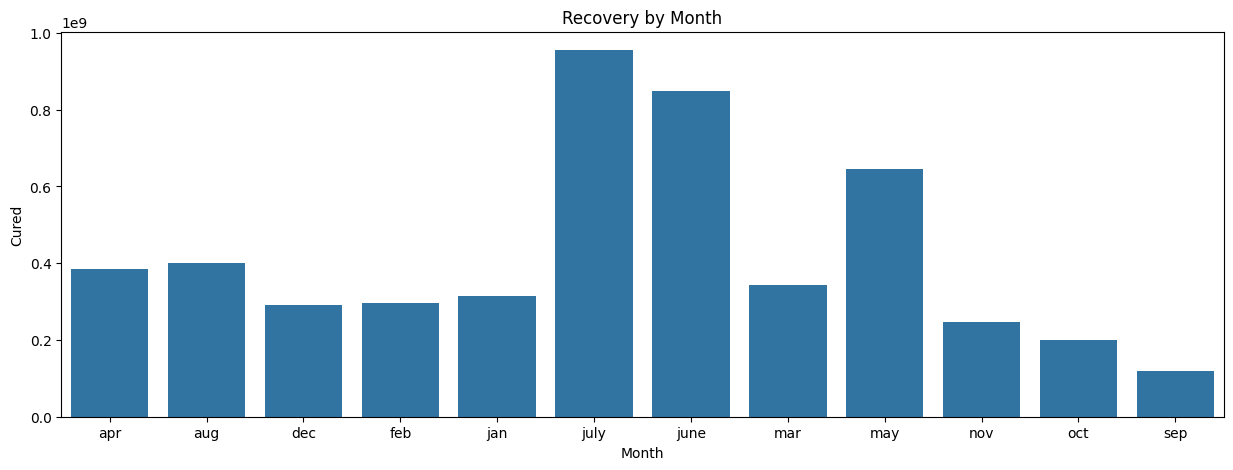

In [37]:
# Cured distribution by Month
plt.figure(figsize = (15,5))
cx = sns.barplot(x = 'Month',y = 'Cured',data = pivot3)
plt.title('Recovery by Month')
plt.show()

Maximum active cases occurred in May.
Maximum deaths happened in July and June.
The recovery rate was highest in July, followed by June and May, respectively.

In [38]:
# state vs active_rate distribution (linechart)
month_data = df.groupby(['Month','State/UnionTerritory'])[['Active_case']].sum()
month_data

Active_case
Month State/UnionTerritory                    
apr   Andaman and Nicobar Islands         3320
      Andhra Pradesh                   1286802
      Arunachal Pradesh                   7019
      Assam                             236557
      Bihar                            1149850
...                                        ...
sep   Telengana                         930195
      Tripura                           194669
      Uttar Pradesh                    1862730
      Uttarakhand                       290445
      West Bengal                       731518

[441 rows x 1 columns]

In [39]:
data1 = df[df['State/UnionTerritory'].isin(['Maharashtra','Kerala','Karnataka','Tamil Nadu'])]

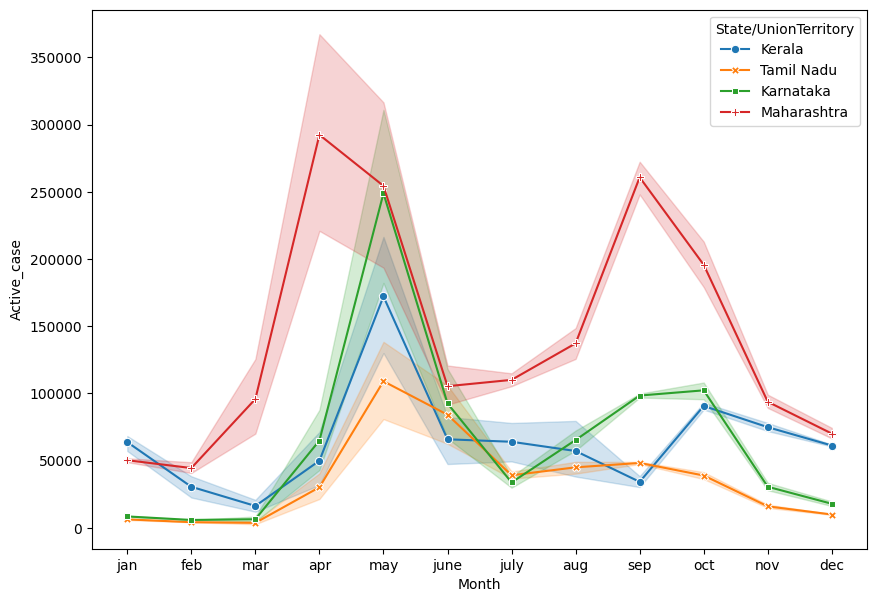

In [40]:
plt.figure(figsize = (10,7))
cx = sns.lineplot( data=data1,
    x='Month',
    y='Active_case',
    hue='State/UnionTerritory',
    style='State/UnionTerritory',  # Different line styles for each state
    markers=True,                 # Add markers at data points
    dashes=False   )
plt.show()

# Year Wise Data Analysis

In [41]:
pivot2 = pd.pivot_table(data = df, index = 'Year', values =['Active_case','Deaths','Cured'],aggfunc = 'sum').reset_index()
pivot2

,Year,Active_case,Cured,Deaths
0,2020,115686078,941314195,17022508
1,2021,216478152,4104811257,56366497


Active_case    115686078
Cured          941314195
Deaths          17022508
Name: 0, dtype: int64


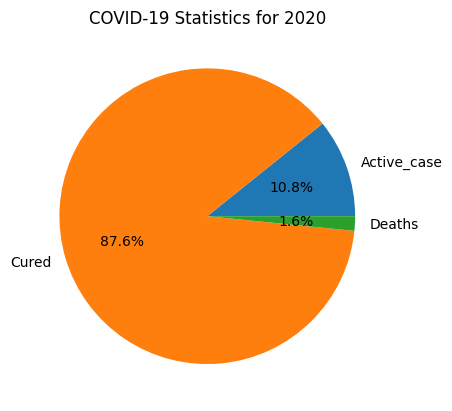

In [42]:
df_2020 = pivot2.iloc[0,1:]
print(df_2020)
# Pie chart 2020
plt.pie(x = df_2020,labels = ['Active_case','Cured','Deaths'] ,autopct='%1.1f%%')
plt.title("COVID-19 Statistics for 2020")
plt.ylabel('')
plt.show()

Active_case     216478152
Cured          4104811257
Deaths           56366497
Name: 1, dtype: int64


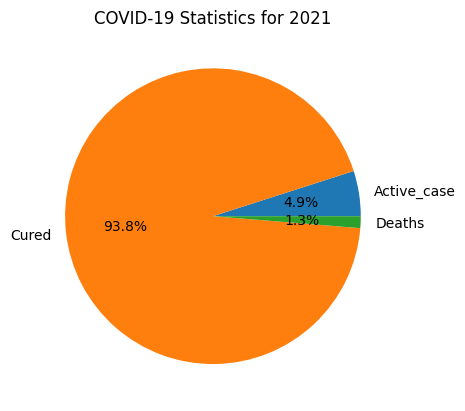

In [43]:
df_2021 = pivot2.iloc[1,1:]
print(df_2021)
# Pie chart 2021
plt.pie(x = df_2021,labels = ['Active_case','Cured','Deaths'] ,autopct='%1.1f%%')
plt.title("COVID-19 Statistics for 2021")
plt.ylabel('')
plt.show()

In [44]:
pivot2

,Year,Active_case,Cured,Deaths
0,2020,115686078,941314195,17022508
1,2021,216478152,4104811257,56366497


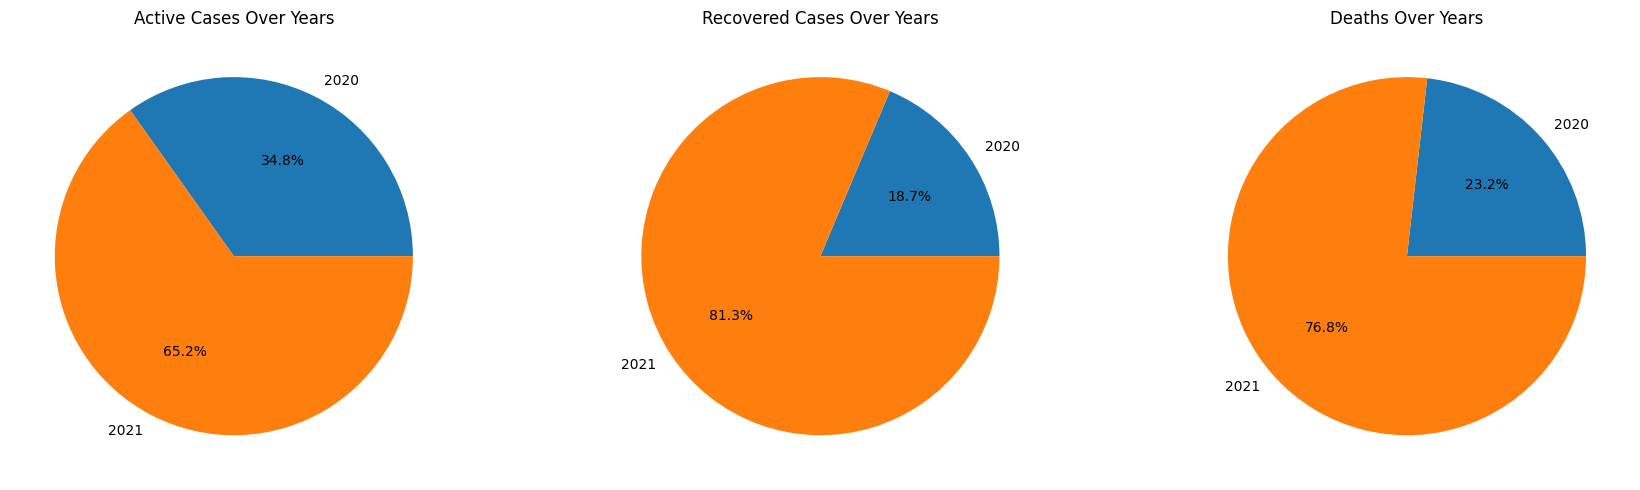

In [45]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns of graphs

# Plot each graph
axes[0].pie(pivot2['Active_case'], labels=pivot2['Year'], autopct='%1.1f%%')
axes[0].set_title("Active Cases Over Years")

axes[1].pie(pivot2['Cured'], labels=pivot2['Year'], autopct='%1.1f%%')
axes[1].set_title("Recovered Cases Over Years")

axes[2].pie(pivot2['Deaths'], labels=pivot2['Year'], autopct='%1.1f%%')
axes[2].set_title("Deaths Over Years")

# Adjust layout and show
plt.tight_layout()
plt.show()


# Vaccinated Data

In [46]:
vaccinated_data = pd.read_csv('cleaned_covid_vaccine_statewise.csv')
vaccinated_data.shape

(3793, 10)

In [47]:
vaccinated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           3793 non-null   object 
 1   State                                3793 non-null   object 
 2   Total Doses Administered             3793 non-null   int64  
 3   18-44 Years(Individuals Vaccinated)  3733 non-null   float64
 4   45-60 Years(Individuals Vaccinated)  3734 non-null   float64
 5   60+ Years(Individuals Vaccinated)    3734 non-null   float64
 6   Male(Individuals Vaccinated)         160 non-null    float64
 7   Female(Individuals Vaccinated)       160 non-null    float64
 8   Transgender(Individuals Vaccinated)  160 non-null    float64
 9   Total Individuals Vaccinated         3793 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 296.5+ KB


In [48]:
vaccinated_data.isna().sum()

Updated On                                0
State                                     0
Total Doses Administered                  0
18-44 Years(Individuals Vaccinated)      60
45-60 Years(Individuals Vaccinated)      59
60+ Years(Individuals Vaccinated)        59
Male(Individuals Vaccinated)           3633
Female(Individuals Vaccinated)         3633
Transgender(Individuals Vaccinated)    3633
Total Individuals Vaccinated              0
dtype: int64

In [49]:
vaccinated_data.fillna(0,inplace = True)
vaccinated_data.isna().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
18-44 Years(Individuals Vaccinated)    0
45-60 Years(Individuals Vaccinated)    0
60+ Years(Individuals Vaccinated)      0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Individuals Vaccinated           0
dtype: int64

# State wise vaccine data analysis

In [50]:
vaccinated_data.columns

Index(['Updated On', 'State', 'Total Doses Administered',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [51]:
# Least 5 state vaccinated
state_data = vaccinated_data[vaccinated_data['State'] != 'India']
least_vaccined_data = state_data.groupby('State')['Total Individuals Vaccinated'].sum().reset_index().sort_values(by = 'Total Individuals Vaccinated')[:5]
least_vaccined_data

,State,Total Individuals Vaccinated
18,Lakshadweep,2045132
0,Andaman and Nicobar Islands,7843390
17,Ladakh,9042643
7,Dadra and Nagar Haveli and Daman and Diu,10841171
29,Sikkim,15408529


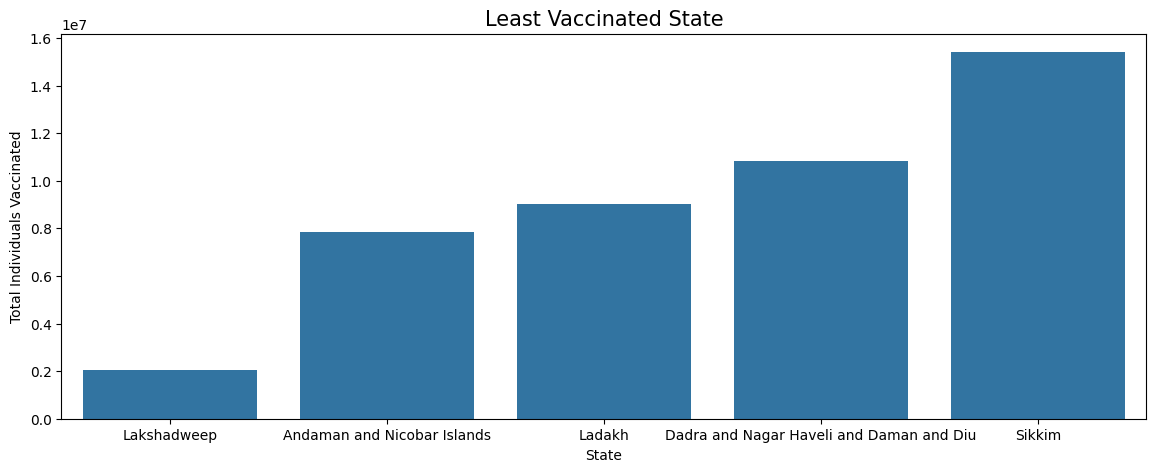

In [52]:
plt.figure(figsize = (14,5))
dx = sns.barplot(x = 'State',y = 'Total Individuals Vaccinated',data = least_vaccined_data)
plt.title('Least Vaccinated State',size = 15)
plt.show()

In [53]:
#top 5 state Vaccinated
top5_vaccined_data = state_data.groupby('State')['Total Individuals Vaccinated'].sum().reset_index().sort_values(by = 'Total Individuals Vaccinated',ascending = False)[:5]

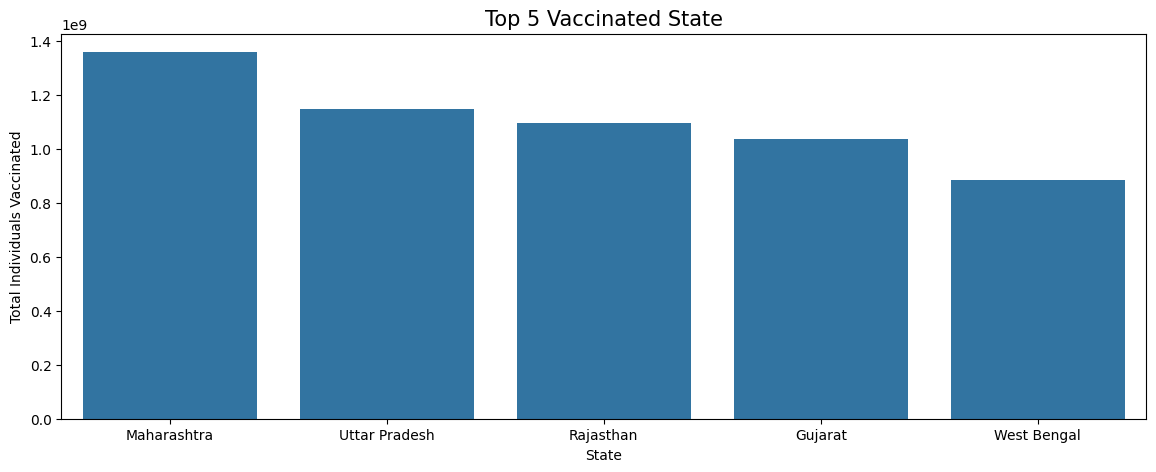

In [54]:
plt.figure(figsize = (14,5))
dx = sns.barplot(x = 'State',y = 'Total Individuals Vaccinated',data = top5_vaccined_data)
plt.title('Top 5 Vaccinated State',size = 15)
plt.show()

# Male vs Female vaccination

In [55]:
vaccinated_data.head()

,Updated On,State,Total Doses Administered,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276,0.0,0.0,0.0,23757.0,24517.0,2.0,48276
1,17-01-2021,India,58604,0.0,0.0,0.0,27348.0,31252.0,4.0,58604
2,18-01-2021,India,99449,0.0,0.0,0.0,41361.0,58083.0,5.0,99449
3,19-01-2021,India,195525,0.0,0.0,0.0,81901.0,113613.0,11.0,195525
4,20-01-2021,India,251280,0.0,0.0,0.0,98111.0,153145.0,24.0,251280


In [56]:
x_data = [vaccinated_data['Male(Individuals Vaccinated)'].sum(),vaccinated_data['Female(Individuals Vaccinated)'].sum()]
print(x_data)

[np.float64(7138698858.0), np.float64(6321628736.0)]


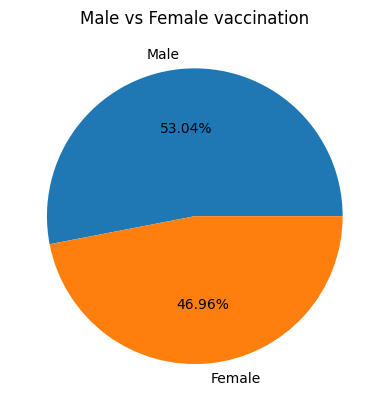

In [58]:
cx = plt.pie(x=x_data, labels=['Male', 'Female'], autopct='%1.2f%%')
plt.title('Male vs Female vaccination')
plt.show()

# state wise age distribution of vaccine

In [59]:
pivot6 = pd.pivot_table(data = state_data,index = 'State',values = ['18-44 Years(Individuals Vaccinated)','45-60 Years(Individuals Vaccinated)','60+ Years(Individuals Vaccinated)'],aggfunc = 'sum')
pivot6

,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated)
State,,,
Andaman and Nicobar Islands,1223324.0,4376537.0,2243271.0
Andhra Pradesh,101023557.0,254203320.0,187877645.0
Arunachal Pradesh,7460518.0,8984788.0,3566261.0
Assam,61397631.0,107917402.0,61222783.0
Bihar,145118819.0,225690190.0,264843188.0
Chandigarh,5287721.0,7913481.0,5823412.0
Chhattisgarh,41727384.0,229332983.0,148175206.0
Dadra and Nagar Haveli and Daman and Diu,5054593.0,4062240.0,1719728.0
Delhi,90950668.0,119317570.0,82315060.0


In [60]:
state_pivot6 = pivot6.reset_index().sort_values(by = '18-44 Years(Individuals Vaccinated)',ascending = False)[:5]
state_pivot7 = pivot6.reset_index().sort_values(by = '45-60 Years(Individuals Vaccinated)',ascending = False)[:5]
state_pivot8 = pivot6.reset_index().sort_values(by = '60+ Years(Individuals Vaccinated)',ascending = False)[:5]

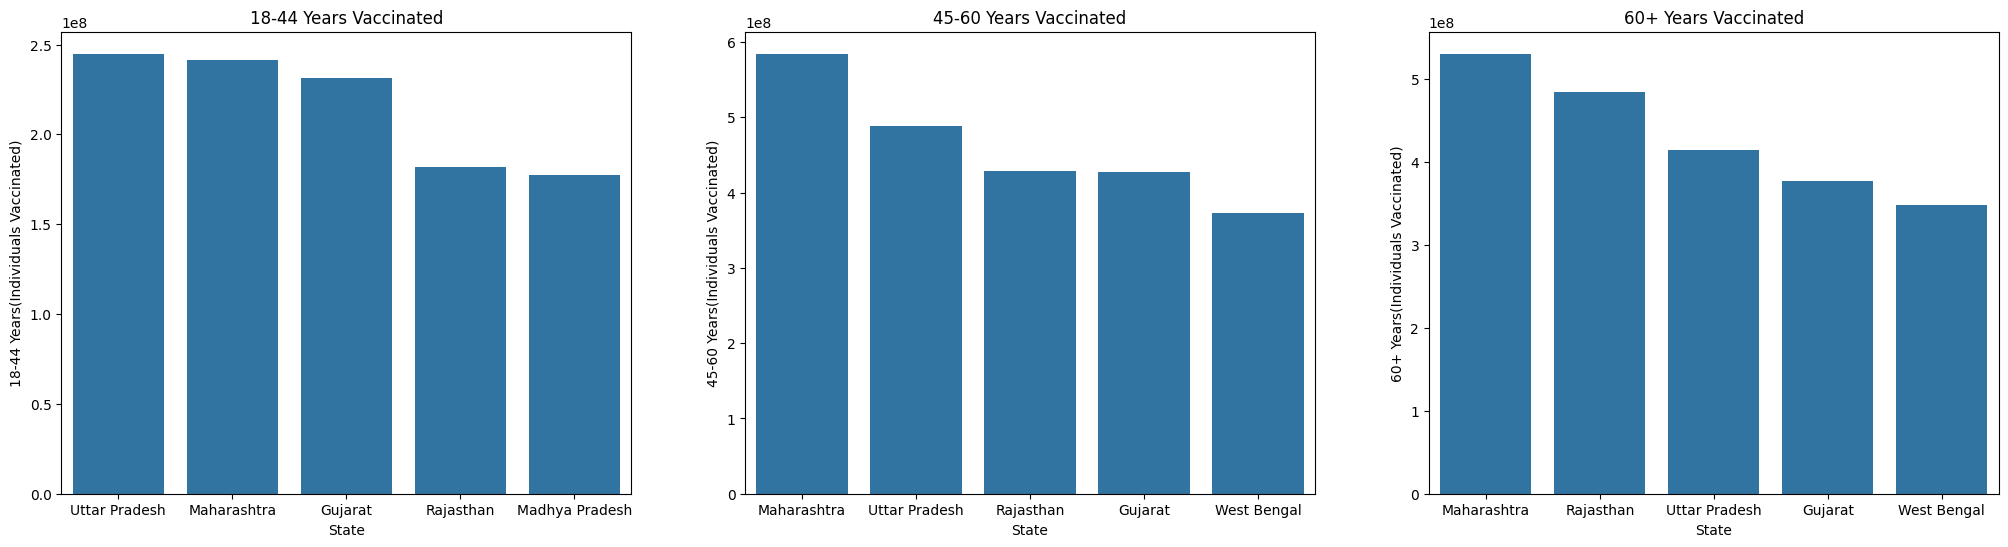

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))  # 1 row, 3 columns

sns.barplot(data = state_pivot6,x = 'State',y = '18-44 Years(Individuals Vaccinated)',ax=axes[0])
axes[0].set_title('18-44 Years Vaccinated')

sns.barplot(data = state_pivot7,x = 'State',y = '45-60 Years(Individuals Vaccinated)',ax=axes[1])
axes[1].set_title('45-60 Years Vaccinated')

sns.barplot(data = state_pivot8,x = 'State',y = '60+ Years(Individuals Vaccinated)',ax=axes[2])
axes[2].set_title('60+ Years Vaccinated')

plt.show()